## 获取股票基本信息

In [1]:
info = get_security_info('000001.XSHE')

In [2]:
info.display_name, info.type, info.start_date

('平安银行', 'stock', datetime.date(1991, 4, 3))

判断股票是否是ST

In [3]:
get_extras('is_st', ['000001.XSHE', '000018.XSHE'], 
           start_date='2013-12-01', end_date='2013-12-03')

,000001.XSHE,000018.XSHE
2013-12-02,False,True
2013-12-03,False,True


## 获取行情数据

In [4]:
data = get_price('000001.XSHE', 
                 start_date='2021-01-01', end_date='2021-12-31')

In [5]:
data.head()

,open,close,high,low,volume,money
2021-01-04,18.95,18.45,18.95,18.30,156643831.0,2.891682e+09
2021-01-05,18.26,18.03,18.34,17.66,183567466.0,3.284607e+09
2021-01-06,17.94,19.41,19.41,17.86,195016094.0,3.648522e+09
2021-01-07,19.37,19.74,19.82,19.08,159664285.0,3.111275e+09
2021-01-08,19.74,19.70,19.94,19.16,120487406.0,2.348316e+09


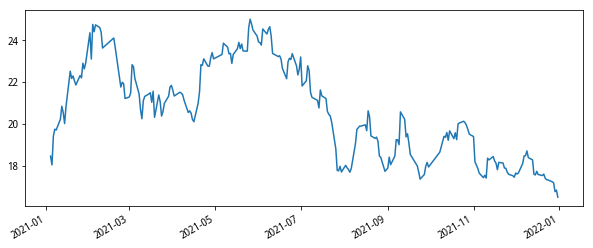

In [6]:
data['close'].plot(figsize=(10,4))

## 获取财务数据

市值数据
https://www.joinquant.com/help/api/help#Stock:%E5%B8%82%E5%80%BC%E6%95%B0%E6%8D%AE

In [7]:
q = query(valuation).filter(valuation.code == '000001.XSHE')
df = get_fundamentals(q, '2015-10-15')
# 市盈率，市净率，市值，流通市值，换手率
df[['pe_ratio','pb_ratio','market_cap',
    'circulating_market_cap','turnover_ratio']].iloc[0]

pe_ratio                     7.4984
pb_ratio                     1.0593
market_cap                1598.2791
circulating_market_cap    1318.5129
turnover_ratio               0.4116
Name: 0, dtype: float64

资产负债表：https://www.joinquant.com/help/api/help#Stock:%E8%B5%84%E4%BA%A7%E8%B4%9F%E5%80%BA%E6%95%B0%E6%8D%AE

In [8]:
q = query(balance).filter(valuation.code == '000001.XSHE')
df = get_fundamentals(q, '2019-10-15')
# 固定资产，货币资金，负债合计,股东权益合计
df[['fixed_assets', 'cash_equivalents',
    'total_liability','total_owner_equities']].iloc[0]

fixed_assets            1.057800e+10
cash_equivalents        2.697940e+11
total_liability         3.334163e+12
total_owner_equities    2.566030e+11
Name: 0, dtype: float64

现金流：https://www.joinquant.com/help/api/help#Stock:%E7%8E%B0%E9%87%91%E6%B5%81%E6%95%B0%E6%8D%AE

In [9]:
q = query(cash_flow).filter(valuation.code == '000001.XSHE')
df = get_fundamentals(q, '2015-10-15')
# 经营活动产生的现金流量净额，投资活动产生的现金流量净额，筹资活动产生的现金流量净额
df[['net_operate_cash_flow', 'net_invest_cash_flow','net_finance_cash_flow']].iloc[0]

net_operate_cash_flow    1.710270e+11
net_invest_cash_flow    -2.714300e+10
net_finance_cash_flow    3.663500e+10
Name: 0, dtype: float64

利润数据:https://www.joinquant.com/help/api/help#Stock:%E5%88%A9%E6%B6%A6%E6%95%B0%E6%8D%AE

In [10]:
q = query(income).filter(valuation.code == '000001.XSHE')
df = get_fundamentals(q, '2015-10-15')
# 营业收入,营业成本,营业利润,净利润
df[['operating_revenue','operating_cost','operating_profit','net_profit']].iloc[0]

operating_revenue    2.590400e+10
operating_cost       1.808400e+10
operating_profit     7.820000e+09
net_profit           5.956000e+09
Name: 0, dtype: float64

财务指标数据:https://www.joinquant.com/help/api/help#Stock:%E8%B4%A2%E5%8A%A1%E6%8C%87%E6%A0%87%E6%95%B0%E6%8D%AE

In [11]:
q = query(indicator).filter(valuation.code == '000001.XSHE')
df = get_fundamentals(q, '2015-10-15')
# 净资产收益率ROE,销售毛利,销售净利率,营业收入同比增长率,营业利润同比增长率,净利润同比增长率
df[['roe','gross_profit_margin','net_profit_margin',
    'inc_revenue_year_on_year','inc_operation_profit_year_on_year',
    'inc_net_profit_year_on_year']].iloc[0]

roe                                   4.14
gross_profit_margin                    NaN
net_profit_margin                    22.99
inc_revenue_year_on_year             39.02
inc_operation_profit_year_on_year    17.90
inc_net_profit_year_on_year          18.69
Name: 0, dtype: float64

## 基本选股

In [12]:
# 选出所有的总市值大于1000亿元, 市盈率小于10, 
#营业总收入大于200亿元, roe 大于 5 的股票
df = get_fundamentals(query(
      valuation.code, valuation.market_cap, 
      valuation.pe_ratio, income.total_operating_revenue,
      indicator.roe
  ).filter(
      valuation.market_cap > 1000,
      valuation.pe_ratio < 10,
      income.total_operating_revenue > 2e10,
      indicator.roe > 5
  ).order_by(
      # 按市值降序排列
      valuation.market_cap.desc()
  ).limit(
      # 最多返回100个
      100
      ), date='2022-03-15')

In [13]:
df.head()

,code,market_cap,pe_ratio,total_operating_revenue,roe
0,601919.XSHG,2394.1162,2.6811,9.221423e+10,31.65
1,600309.XSHG,2372.0786,9.6235,3.821936e+10,7.71
2,000651.XSHE,1845.3143,7.6502,4.753802e+10,6.49
3,000725.XSHE,1583.9648,6.1332,5.599302e+10,5.78
4,600346.XSHG,1440.9037,8.8518,4.691411e+10,7.80


In [14]:
for code in df['code']:
    print(code, get_security_info(code).display_name)

601919.XSHG 中远海控
600309.XSHG 万华化学
000651.XSHE 格力电器
000725.XSHE 京东方A
600346.XSHG 恒力石化
601225.XSHG 陕西煤业
